In [1]:
import numpy as np
import pandas as pd
from  statsmodels.tsa import stattools as ts 
import pandas_datareader as pdr
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression


In [2]:
ewadf = pd.read_csv("../data/EWA.csv")
ewadf.columns = ["Date", "Open", "High", "Low", "Close", "Volume", "Adjusted"]
ewadf = ewadf.set_index(pd.DatetimeIndex(ewadf['Date']))
ewa = pd.DataFrame(ewadf['Adjusted'], index=ewadf.index)

ewcdf = pd.read_csv("../data/EWC.csv")
ewcdf.columns = ["Date", "Open", "High", "Low", "Close", "Volume", "Adjusted"]
ewcdf = ewcdf.set_index(pd.DatetimeIndex(ewcdf['Date']))
ewc = pd.DataFrame(ewcdf['Adjusted'], index=ewcdf.index)


In [3]:
ewc.head()

Adjusted
Date                 
2006-04-26  19.343941
2006-04-27  19.211714
2006-04-28  19.336164
2006-05-01  19.421721
2006-05-02  19.631725

/Users/sujogale/qstrader/qstraderp3/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


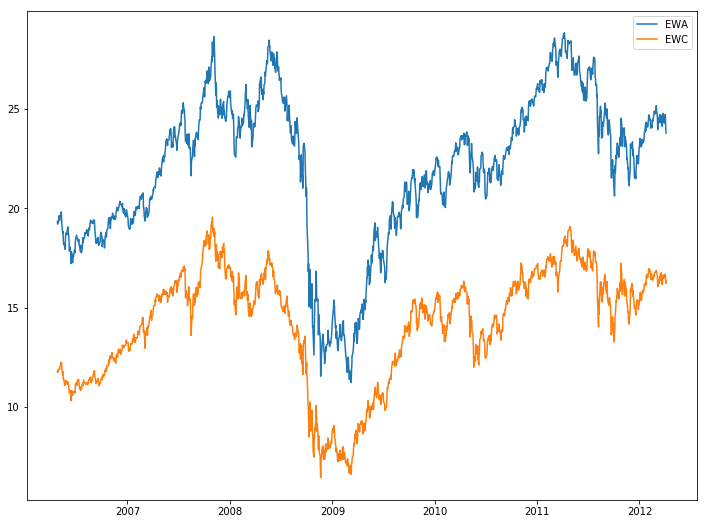

In [4]:
plt.figure(figsize=(12, 9))

plt.plot(ewc['Adjusted'])
plt.plot(ewa['Adjusted'])
plt.legend(["EWA", "EWC"])

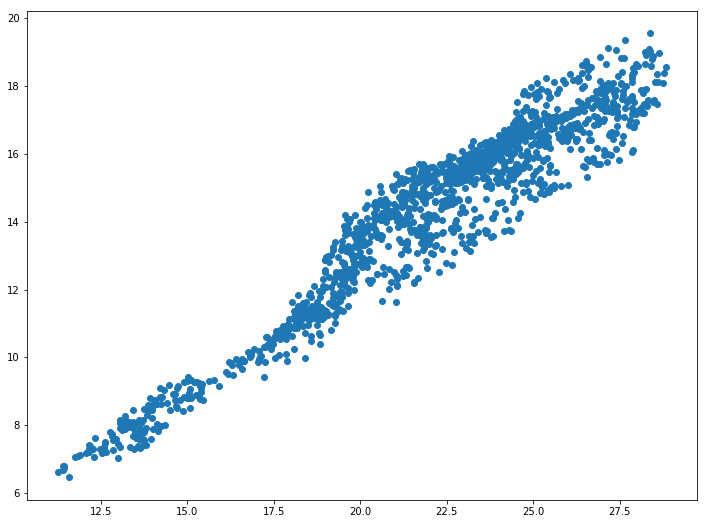

In [5]:
plt.figure(figsize=(12, 9))

plt.scatter(ewc["Adjusted"], ewa['Adjusted'])

In [6]:

def lm(y, x):
    x = np.array(x).reshape((-1,1))
    y = np.array(y)
    lm = LinearRegression()
    lm.fit(x,y)
    print("intercept %.3f"%lm.intercept_)
    print("coef %.3f"%lm.coef_)
    resid = y-lm.predict(x)
    return lm,resid

In [7]:
comb1, resid1 = lm(ewc['Adjusted'].values, ewa['Adjusted'].values)
comb2, resid2 = lm(ewa['Adjusted'].values, ewc['Adjusted'].values)

intercept 3.575
coef 1.294
intercept -1.419
coef 0.711


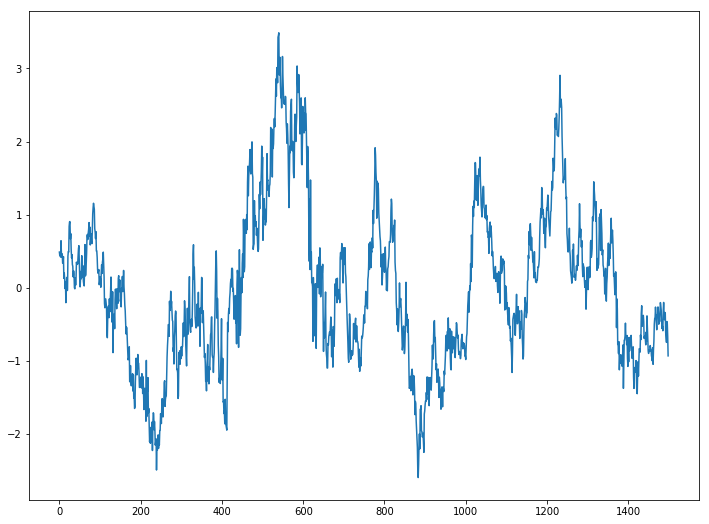

In [8]:
plt.figure(figsize=(12,9))
plt.plot(resid1)

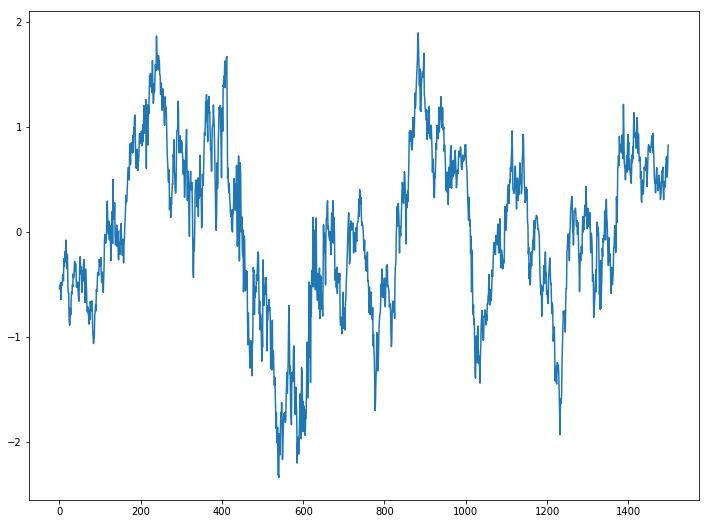

In [9]:
plt.figure(figsize=(12,9))
plt.plot(resid2)

In [10]:
ts.adfuller(resid1, maxlag=1)

(-3.644006358636729,
 0.004973357176206228,
 1,
 1497,
 {'1%': -3.434725783926551,
  '5%': -2.863472629385615,
  '10%': -2.567798908763865},
 -85.257978146798)

In [11]:
ts.adfuller(resid2, maxlag=1)

(-3.647464818623792,
 0.0049158139189573605,
 1,
 1497,
 {'1%': -3.434725783926551,
  '5%': -2.863472629385615,
  '10%': -2.567798908763865},
 -934.6049934726084)

In [12]:
# The resid2 is slightly more negative than resid1. So we will use resid2 for cointegration(ewc will be independent)

In [13]:
def get_pricing(csv = '../data/INFY.csv'):
    df = pd.read_csv(csv, index_col = 'Date')
    df = df[df.index > '2010-01-01']
    cl = pd.DataFrame(df['Close'])
    cl['logClose'] = np.log(cl['Close'])
    cl['diffLogClose'] = cl['logClose'] - cl['logClose'].shift(1)
    cl['pctChange'] = cl['Close'].pct_change()
    cl = cl.dropna()
    return cl

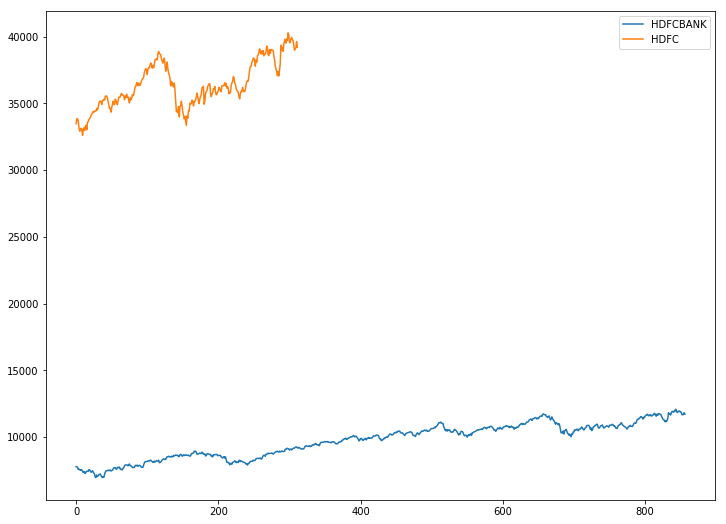

In [14]:
hdfcbank = get_pricing("../data/NIFTY 50.csv")
banknifty = get_pricing("../data/SENSEX.csv")
plt.figure(figsize=(12,9))
plt.plot(hdfcbank['Close'].values)
plt.plot(banknifty['Close'].values)
plt.legend(["HDFCBANK", "HDFC"])

intercept 969.650
coef 0.275
intercept -2851.852
coef 3.574


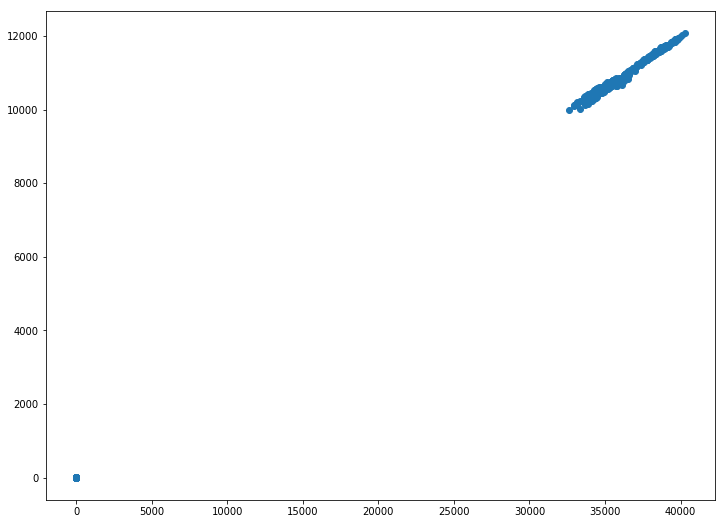

In [15]:
len(banknifty.index)
len(hdfcbank.index)
pd.merge(banknifty, hdfcbank, how='inner', on=['Date'])
intr = banknifty.index.intersection(hdfcbank.index)
len(banknifty.loc[intr])
len(hdfcbank.loc[intr])
plt.figure(figsize=(12,9))
plt.scatter(banknifty.loc[intr].dropna(), hdfcbank.loc[intr].dropna())

cmb1, rsd1 = lm(hdfcbank.loc[intr]['Close'], banknifty.loc[intr]['Close'])
cmb2, rsd2 = lm(banknifty.loc[intr]['Close'], hdfcbank.loc[intr]['Close'])

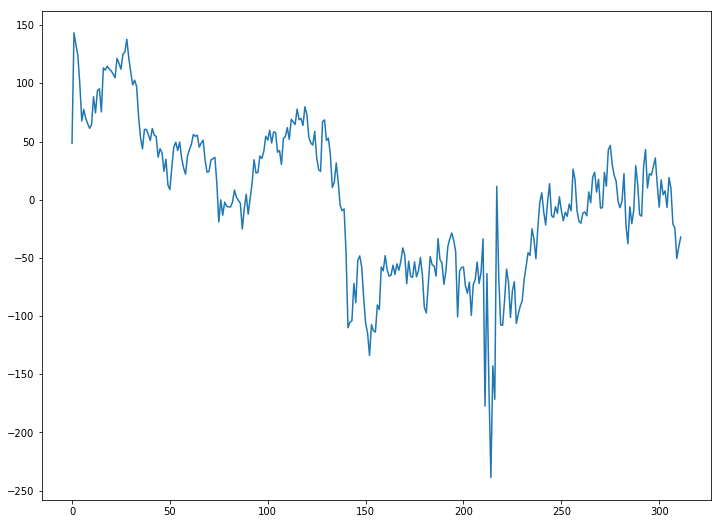

In [16]:
plt.figure(figsize=(12,9))
plt.plot(rsd1)

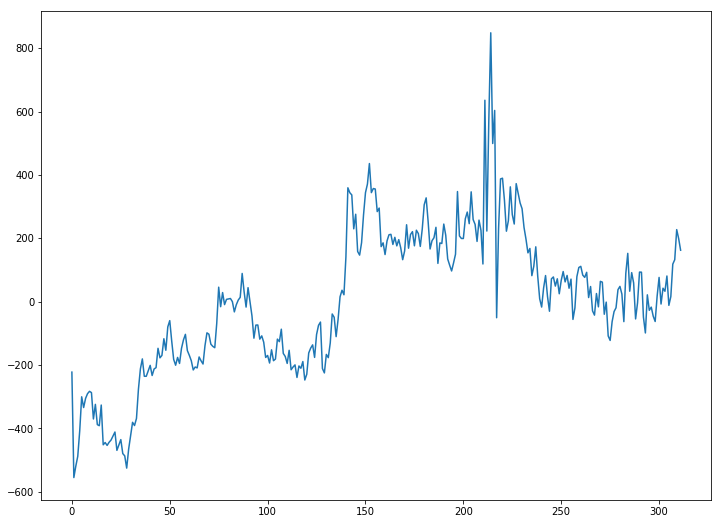

In [17]:
plt.figure(figsize=(12,9))
plt.plot(rsd2)

In [18]:
ts.adfuller(rsd1, maxlag=1)

(-2.8786394932767094,
 0.047888915683234966,
 1,
 310,
 {'1%': -3.451621854687657,
  '5%': -2.870908950689806,
  '10%': -2.571761810613944},
 2823.4158390472844)

In [19]:
ts.adfuller(rsd2, maxlag=1)

(-2.8266748619077937,
 0.05456331909179384,
 1,
 310,
 {'1%': -3.451621854687657,
  '5%': -2.870908950689806,
  '10%': -2.571761810613944},
 3601.089064296828)